## Линейная регрессия

In [ ]:
y = ax + a1x1 + a2x2 + b

<img src='https://neurohive.io/wp-content/uploads/2018/10/lineinaja-regressija-e1539097909123.png' width=500>

Линейные модели - это такие модели, которые сводятся к суммированию значений признаков с некоторыми весами. Само название модели говорит о том, что зависимость предсказываемой переменной от признаков будет линейной:

$$a(x) = w_{0}+\sum^{d}_{i=1}w_{i}x_{i}.$$


In [ ]:
import numpy as np
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

Поработаем с данными о продажах и оценках видеоигр с [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

In [ ]:
!wget https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL -O videogames.csv

--2024-08-22 09:33:40--  https://drive.google.com/uc?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.google.com (drive.google.com)... 172.253.63.101, 172.253.63.113, 172.253.63.100, ...
Connecting to drive.google.com (drive.google.com)|172.253.63.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL [following]
--2024-08-22 09:33:41--  https://drive.usercontent.google.com/download?id=1GjWxnBDtloQ_qXE8eawLYhWEpve5aeXL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 64.233.180.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|64.233.180.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1618040 (1.5M) [application/octet-stream]
Saving to: ‘videogames.csv’

videogames.csv      100%[===================>]   1.54M  --.-KB/s    in 0.08s   

2024-08-22 09:33:43 (20.4 MB/s)

In [ ]:
import pandas as pd

df = pd.read_csv('videogames.csv')
print(df.shape)

(16719, 16)


In [ ]:
df.dtypes

,0
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


In [ ]:
# пропуски
df = df.dropna()

df = df[~(df['User_Score'] == 'tbd')]
df['User_Score'] = df['User_Score'].astype('float')
df['User_Score'] *= 10

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 906.4+ KB


In [ ]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.00000000,Sports,Nintendo,41.36000000,28.96000000,3.77000000,8.45000000,82.53000000,76.00000000,51.00000000,80.00000000,322.00000000,Nintendo,E
2,Mario Kart Wii,Wii,2008.00000000,Racing,Nintendo,15.68000000,12.76000000,3.79000000,3.29000000,35.52000000,82.00000000,73.00000000,83.00000000,709.00000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.00000000,Sports,Nintendo,15.61000000,10.93000000,3.28000000,2.95000000,32.77000000,80.00000000,73.00000000,80.00000000,192.00000000,Nintendo,E
6,New Super Mario Bros.,DS,2006.00000000,Platform,Nintendo,11.28000000,9.14000000,6.50000000,2.88000000,29.80000000,89.00000000,65.00000000,85.00000000,431.00000000,Nintendo,E
7,Wii Play,Wii,2006.00000000,Misc,Nintendo,13.96000000,9.18000000,2.93000000,2.84000000,28.92000000,58.00000000,41.00000000,66.00000000,129.00000000,Nintendo,E


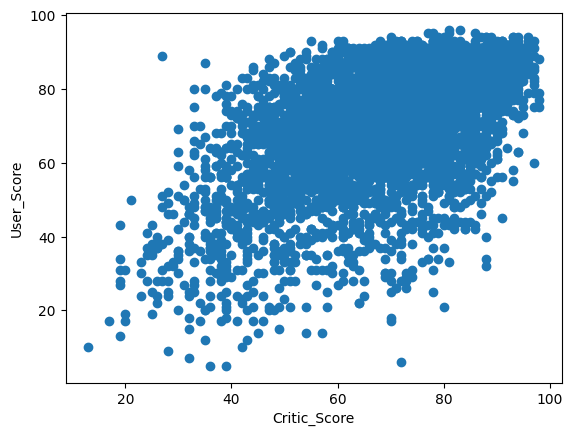

In [ ]:
plt.scatter(df['Critic_Score'], df['User_Score'])
plt.xlabel('Critic_Score')
plt.ylabel('User_Score');

In [ ]:
from sklearn.linear_model import LinearRegression # линейная регрессия

In [ ]:
X = df[['Critic_Score']]
y = df['User_Score']

In [ ]:
X.shape

(6825, 1)

In [ ]:
y

,User_Score
0,80.00000000
2,83.00000000
3,80.00000000
6,85.00000000
7,66.00000000
...,...
16667,24.00000000
16677,88.00000000
16696,76.00000000
16700,58.00000000


In [ ]:
model = LinearRegression()
model.fit(X, y) # метод фит - метод обучения модели

LinearRegression()

In [ ]:
model.coef_

array([0.60253109])

In [ ]:
model.intercept_

29.515146099218455

In [ ]:
y_predict = model.predict(X) # получаем предсказанное значение
y_predict[:5]

array([75.30750884, 78.92269538, 77.7176332 , 83.140413  , 64.46194925])

In [ ]:
X.iloc[0].values * model.coef_ + model.intercept_

array([75.30750884])

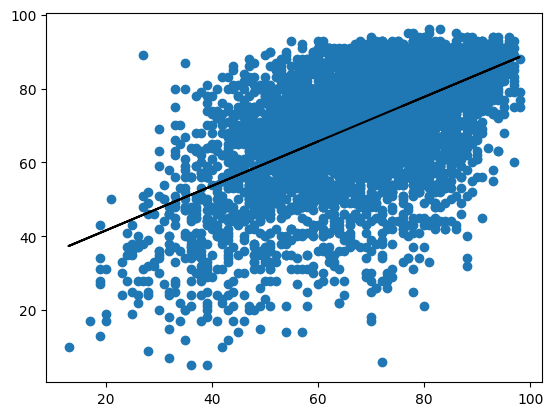

In [ ]:
plt.plot(X, y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

In [ ]:
model.score(X, y)

0.3367694117315977

In [ ]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X)
np.sqrt(mean_squared_error(y, pred))

11.725877510520036

### 🧠 Упражнение 1

Используйте все численные признаки из датасета

1. Инициализируйте и обучите модель Линейной регрессии
2. Сделайте предсказаний на одном объекте
    * Через перемножение признаков на коэффициенты
    * Через метод `predict`
3. Оцените метрику R2 и RMSE

#### 🧠 Упражнение 1. Ответ


Используйте все численные признаки из датасета

In [ ]:
X = df.select_dtypes(exclude='object').drop(columns=['User_Score'])
X.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
6,2006.0,11.28,9.14,6.50,2.88,29.80,89.0,65.0,431.0
7,2006.0,13.96,9.18,2.93,2.84,28.92,58.0,41.0,129.0


In [ ]:
y = df['User_Score']
y.head()

,User_Score
0,80.0
2,83.0
3,80.0
6,85.0
7,66.0


1. Инициализируйте и обучите модель Линейной регрессии

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

2. Сделайте предсказаний на одном объекте
    * Через перемножение признаков на коэффициенты
    * Через метод `predict`

In [ ]:
X.iloc[0]

,0
Year_of_Release,2006.00
NA_Sales,41.36
EU_Sales,28.96
JP_Sales,3.77
Other_Sales,8.45
Global_Sales,82.53
Critic_Score,76.00
Critic_Count,51.00
User_Count,322.00


In [ ]:
np.sum(X.iloc[0].values * model.coef_) + model.intercept_

34.50610206758802

In [ ]:
model.predict(X.iloc[:1])

array([34.50610207])

3. Оцените метрику R2 и RMSE

In [ ]:
model.score(X, y)

0.41562965417031383

In [ ]:
pred = model.predict(X)
np.sqrt(mean_squared_error(y, pred))

11.006700875665327

In [ ]:
pred[(pred < 0) | (pred > 100)]

array([100.19732686, 100.05182257])

### Градиентный спуск

Среднеквадратичная ошибка имеет один минимум и непрерывна на всей области значений (то есть является выпуклой и гладкой), а значит в каждой ее точке можно посчитать частные производные.

Вспомним, что _градиентом_ функции $f$ называется $n$-мерный вектор из частных производных.

$$ \nabla f(x_{1},...,x_{d}) = \left(\frac{\partial f}{\partial x_{i}}\right)^{d}_{i=1}.$$

При этом известно, что __градиент задает направление наискорейшего роста функции__. Значит, антиградиент будет показывать направление ее скорейшего убывания, что будет полезно нам в нашей задаче минимизации функционала ошибки.

**Градиентный спуск** — метод нахождения локального экстремума функции (минимума или максимума) с помощью движения вдоль градиента.

In [ ]:
df(x1, x2, x3) = (df(x1), df(x2), df(x3))

Для решения задачи нам требуется определить некоторую стартовую точку и итерационно сдвигаться от нее в сторону антиградиента с определенным _шагом_ $\eta_{k}$, на каждом шагу пересчитывая градиент в точке, в которой мы находимся. Таким образом, имея начальный вектор весов $w^{0}$, $k$-й шаг градиентного спуска будет иметь вид

$$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X).$$


Итерации следует продолжать, пока не наступает сходимость. Она определяется разными способами, но в даннном случае удобно определять как ситуацию, когда векторы весов от шага к шагу изменяются незначительно, то есть норма отклонения вектора весов на текущем шаге от предыдущего не привышает заданное значение $\varepsilon$:

$$||w^{k}-w^{k-1}|| < \varepsilon.$$

<img src="https://drive.google.com/uc?id=1124gS0me7DtIak4OJJAHw2H8aouLu9AX">

Начальный вектор весов $w_{0}$ также можно определять различными способами, обычно его берут нулевым или состоящим из случайных небольших чисел.

In [ ]:
1. w0 = 0
2. k = 2:
        w3 = w2 - grad(w2)
        || w3 - w2 || < eps

1. Инициализация w

2. Цикл по k = 1,2,3,...:

$w^{k} = w^{k-1} - \eta_{k}\nabla Q(w^{k-1}, X)$

Если $||w^{k} - w^{k-1}|| < \epsilon$, то завершить.


Смоделируем работу градиентного спуска при помощи Numpy.

In [ ]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y):
    y_pred = X.dot(w)
    return (np.sum((y_pred - y)**2)) / len(y)

В случае многомерной регрессии (при количестве признаков больше 1) при оптимизации функционала ошибки

$$Q(w, X) = \frac{1}{l}||Xw-y||^{2}\rightarrow \underset{w}{\text{min}}$$

формула вычисления градиента принимает вид

$$\nabla_{w}Q(w,X) = \frac{2}{l}X^{T}(Xw-y).$$

In [ ]:
X = df[['Critic_Score']]
y = df['User_Score']

X['for bias'] = 1
X.head()

<ipython-input-239-df96d6a35bbb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['for bias'] = 1


,Critic_Score,for bias
0,76.00000000,1
2,82.00000000,1
3,80.00000000,1
6,89.00000000,1
7,58.00000000,1


In [ ]:
n_features = X.shape[1]

In [ ]:
# возьмем нулевые начальные веса
w = np.zeros(n_features)

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.0001

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    y_pred = np.dot(X, w)
    dQ = 2 / y.shape[0] * np.dot(X.T, y_pred - y)
    new_w = w - eta * dQ
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    error = mserror(X, new_w, y)

    w_list.append(new_w.copy())
    errors.append(error)

    if iter_num % 100 == 0:
        print(f'Iter {iter_num}: error - {error}')

    iter_num += 1
    w = new_w

w_list = np.array(w_list)
w_pred = w_list[-1]

print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

Iter 0: error - 173.7126469796156
Iter 100: error - 170.07002711127626
Iter 200: error - 170.02123319524057
Iter 300: error - 169.9725123699867
Iter 400: error - 169.92386452602835
Iter 500: error - 169.87528955404343
Iter 600: error - 169.82678734487325
Iter 700: error - 169.77835778952306
Iter 800: error - 169.73000077916097
Iter 900: error - 169.68171620511848
Iter 1000: error - 169.63350395888963
Iter 1100: error - 169.58536393213114
Iter 1200: error - 169.53729601666177
Iter 1300: error - 169.48930010446261
Iter 1400: error - 169.44137608767653
Iter 1500: error - 169.39352385860784
Iter 1600: error - 169.34574330972222
Iter 1700: error - 169.29803433364637
Iter 1800: error - 169.25039682316802
Iter 1900: error - 169.2028306712352
Iter 2000: error - 169.1553357709567
Iter 2100: error - 169.107912015601
Iter 2200: error - 169.06055929859673
Iter 2300: error - 169.01327751353216
Iter 2400: error - 168.96606655415476
Iter 2500: error - 168.9189263143713
Iter 2600: error - 168.87185668

In [ ]:
y_pred = np.dot(X, w)

np.sqrt(mean_squared_error(y, y_pred))

12.867705357544377

Text(0, 0.5, 'MSE')

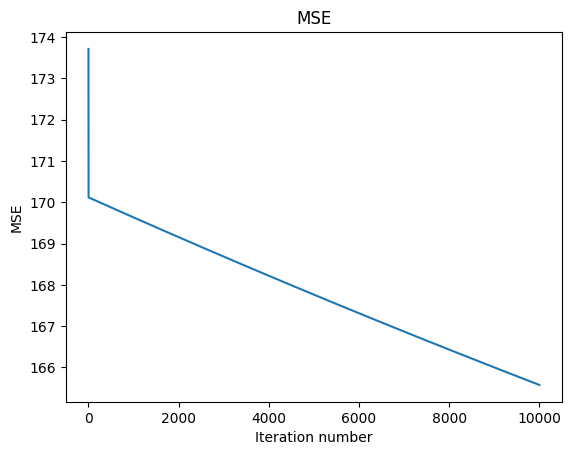

In [ ]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

### Полиномиальная регрессия

In [ ]:
X = df.select_dtypes(exclude='object').drop(columns=['User_Score'])
y = df['User_Score']

X.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.00000000,41.36000000,28.96000000,3.77000000,8.45000000,82.53000000,76.00000000,51.00000000,322.00000000
2,2008.00000000,15.68000000,12.76000000,3.79000000,3.29000000,35.52000000,82.00000000,73.00000000,709.00000000
3,2009.00000000,15.61000000,10.93000000,3.28000000,2.95000000,32.77000000,80.00000000,73.00000000,192.00000000
6,2006.00000000,11.28000000,9.14000000,6.50000000,2.88000000,29.80000000,89.00000000,65.00000000,431.00000000
7,2006.00000000,13.96000000,9.18000000,2.93000000,2.84000000,28.92000000,58.00000000,41.00000000,129.00000000


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# pf = PolynomialFeatures(degree=6).fit(X_train)
# X_train_tmp = pf.transform(X_train)
# X_test_tmp = pf.transform(X_test)

# model = LinearRegression().fit(X_train_tmp, y_train)

# res_tmp = pd.DataFrame({
#     'degree': [6],
#     'feature_num': [X_train_tmp.shape[1]],
#     'train_score': [model.score(X_train_tmp, y_train)],
#     'test_score': [model.score(X_test_tmp, y_test)]})


# res_tmp

,degree,feature_num,train_score,test_score
0,6,12376,1.000,-261834848460931.281


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm


res = pd.DataFrame(columns=['degree', 'feature_num', 'train_score', 'test_score'])

degrees = np.arange(1, 7)
for degree in tqdm(degrees):
    pf = PolynomialFeatures(degree=degree).fit(X_train)
    X_train_tmp = pf.transform(X_train)
    X_test_tmp = pf.transform(X_test)

    ss = StandardScaler().fit(X_train_tmp)
    X_train_tmp = ss.transform(X_train_tmp)
    X_test_tmp = ss.transform(X_test_tmp)


    model = LinearRegression().fit(X_train_tmp, y_train)

    res_tmp = pd.DataFrame({
        'degree': [degree],
        'feature_num': [X_train_tmp.shape[1]],
        'train_score': [model.score(X_train_tmp, y_train)],
        'test_score': [model.score(X_test_tmp, y_test)]
    })
    res = pd.concat([res, res_tmp])

  0%|          | 0/6 [00:00<?, ?it/s]<ipython-input-246-c6b242403127>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res = pd.concat([res, res_tmp])
100%|██████████| 6/6 [01:31<00:00, 15.27s/it]


In [ ]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.8f' % x)

In [ ]:
res.sort_values('test_score', ascending=False)

,degree,feature_num,train_score,test_score
0,2,55,0.45745828,0.44005579
0,1,10,0.41354036,0.42041328
0,3,220,0.48766113,0.36153876
0,4,715,0.53430583,-1677.98962763
0,5,2002,0.64676944,-884343993.72710919
0,6,5005,0.80185295,-31428648236621844.00000000


### Регуляризация

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
def f(x):
  return x - 0.15*x**2 + 0.01*x**3 - 0.001*x**4 + 0.0001*x**5

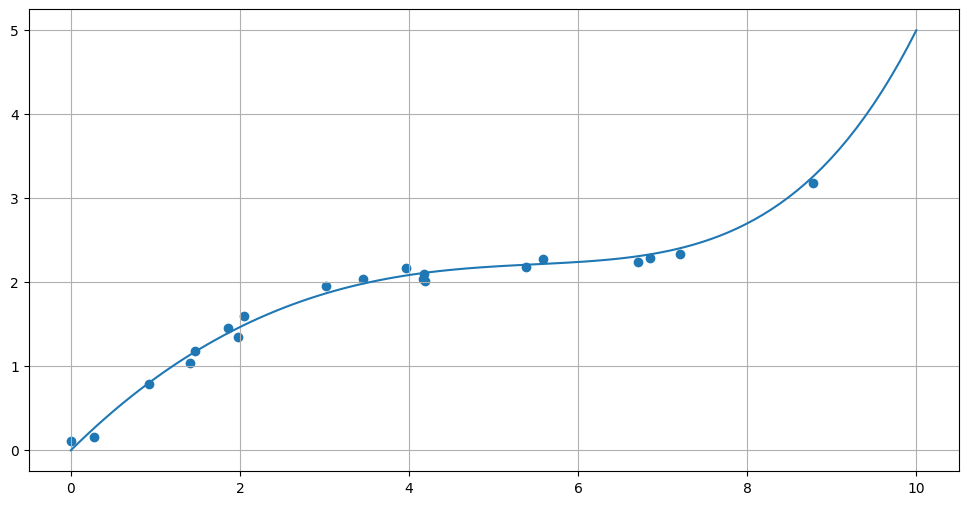

In [ ]:
true_x = np.linspace(0,10,100)
true_y = f(true_x)
true_x = true_x.reshape(-1,1)


np.random.seed(1)
x = np.sort(np.random.uniform(0, 10, 20))
y = f(x) + 0.1*np.random.randn(20)
x = x.reshape(-1,1)


plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.plot(true_x, true_y)
plt.grid()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(PolynomialFeatures(11, include_bias=False),
                     StandardScaler())

pipe.fit(x_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=11, include_bias=False)),
                ('standardscaler', StandardScaler())])

In [ ]:
x_train = pipe.transform(x_train)
x_test = pipe.transform(x_test)

In [ ]:
x_train.shape

(17, 11)

In [ ]:
lg_r, lg_l, coef_r, coef_l = [], [], [], []
list_r = list(1.5**np.linspace(-10, 2, 10))
list_l = list(2**np.linspace(-10, 2, 10))

In [ ]:
list_r

[0.017341529915832612,
 0.02977664442347742,
 0.051128623450501245,
 0.0877914951989026,
 0.15074426239385438,
 0.25883865621816254,
 0.4444444444444444,
 0.7631428283688876,
 1.310370697104448,
 2.25]

In [ ]:
for i in range(len(list_r)):
  m_r = Ridge(alpha=list_r[i]).fit(x_train, y_train)
  m_l = Lasso(alpha=list_l[i]).fit(x_train, y_train)
  lg_r.append(m_r)
  coef_r.append(m_r.coef_)
  lg_l.append(m_l)
  coef_l.append(m_l.coef_)

lg_r.append(LinearRegression().fit(x_train, y_train))
lg_l.append(LinearRegression().fit(x_train, y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.748e-03, tolerance: 7.966e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.484e-03, tolerance: 7.966e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.611e-03, tolerance: 7.966e

In [ ]:
lg_r

[Ridge(alpha=0.017341529915832612),
 Ridge(alpha=0.02977664442347742),
 Ridge(alpha=0.051128623450501245),
 Ridge(alpha=0.0877914951989026),
 Ridge(alpha=0.15074426239385438),
 Ridge(alpha=0.25883865621816254),
 Ridge(alpha=0.4444444444444444),
 Ridge(alpha=0.7631428283688876),
 Ridge(alpha=1.310370697104448),
 Ridge(alpha=2.25),
 LinearRegression()]

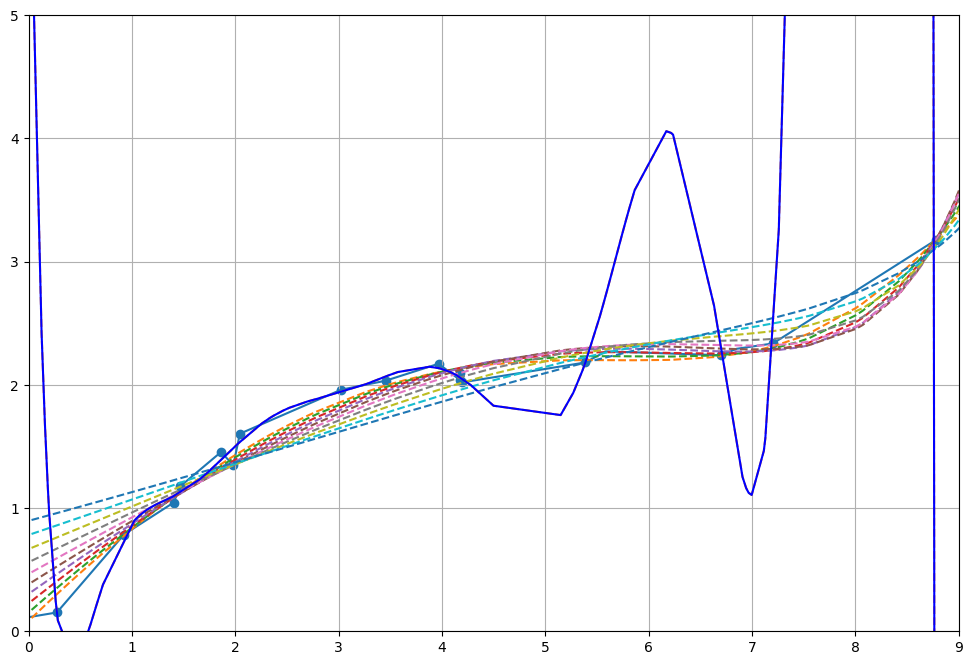

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(x, y)
plt.scatter(x_train, y_train)

x_t = np.sort(np.random.uniform(0, 10, 100)).reshape(-1, 1)
X = pipe.transform(x_t)
for i, m in enumerate(lg_r):
    plt.plot(x_t, m.predict(X), '--')

plt.plot(x_t, lg_r[-1].predict(X), 'b-')
plt.xlim(0,9)
plt.ylim(0,5)
plt.grid()

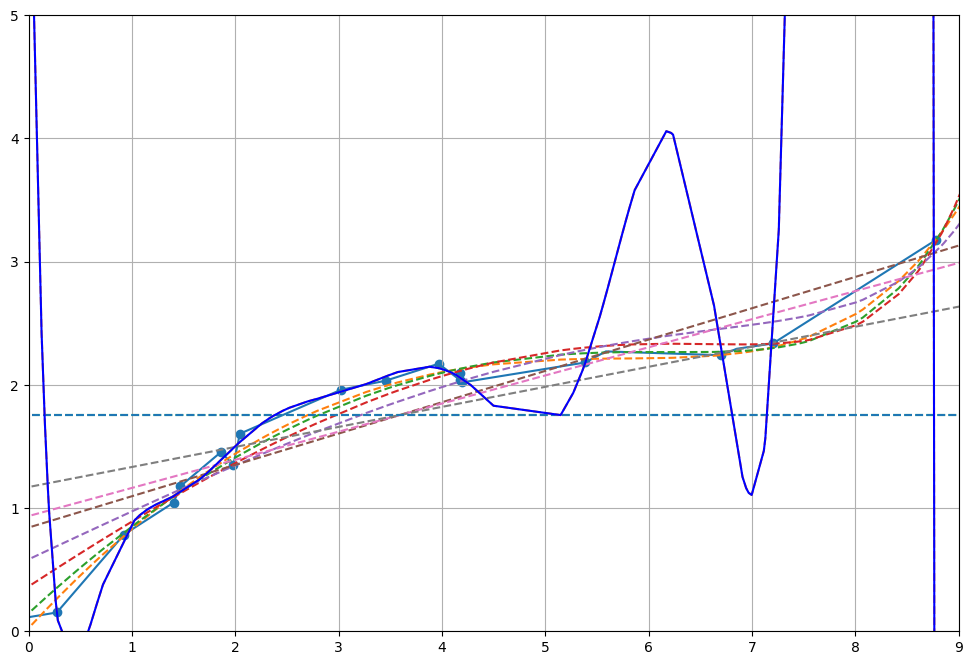

In [ ]:
plt.figure(figsize=[12,8])
plt.plot(x, y)
plt.scatter(x_train, y_train)

for i, m in enumerate(lg_l):
    plt.plot(x_t, m.predict(X), '--')

plt.plot(x_t, lg_l[-1].predict(X), 'b-')
plt.xlim(0,9)
plt.ylim(0,5)
plt.grid()

In [ ]:
np.vstack(coef_r).T

array([[ 1.86421546,  1.6998333 ,  1.52775393,  1.36314562,  1.21271224,
         1.07246916,  0.93393681,  0.79269055,  0.65272251,  0.52318968],
       [-1.23642879, -0.95987176, -0.68746355, -0.44793056, -0.25859935,
        -0.12015185, -0.02295824,  0.04425842,  0.08950009,  0.11692434],
       [-0.81817513, -0.7295557 , -0.62688473, -0.52460166, -0.43040225,
        -0.34384821, -0.26078091, -0.17924353, -0.10260254, -0.03771329],
       [-0.09883915, -0.17250235, -0.23283835, -0.27421584, -0.29170196,
        -0.28311516, -0.24971561, -0.19709431, -0.13535707, -0.07632139],
       [ 0.29966272,  0.17095667,  0.04524377, -0.05972147, -0.13163467,
        -0.1669074 , -0.16889736, -0.14559585, -0.10801966, -0.06754262],
       [ 0.40858942,  0.29457726,  0.17368039,  0.06665196, -0.01272271,
        -0.06051521, -0.079937  , -0.07786646, -0.06266839, -0.04228795],
       [ 0.34941512,  0.28028981,  0.19944159,  0.12361185,  0.06358915,
         0.02246324, -0.00184028, -0.01336967

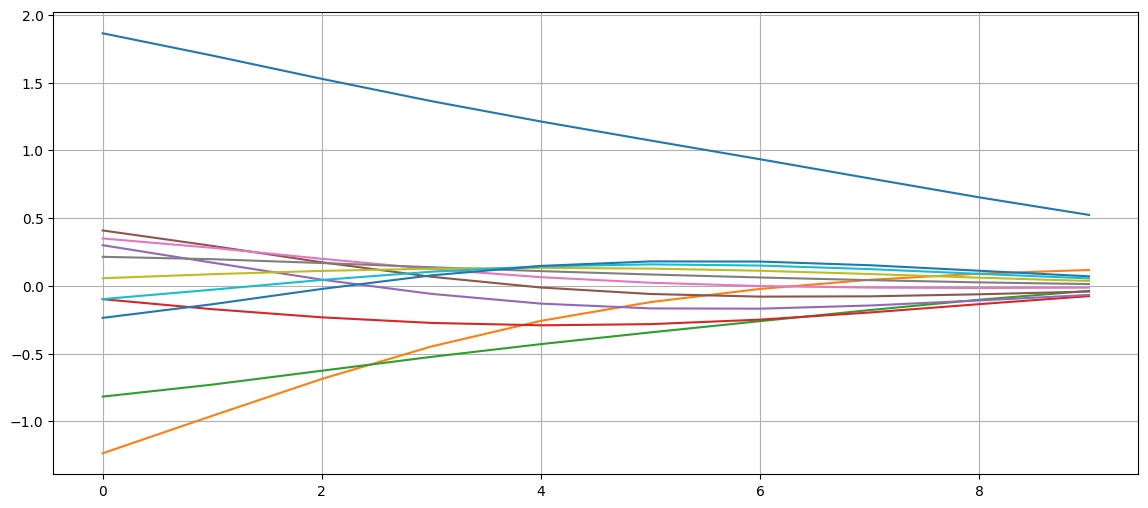

In [ ]:
plt.figure(figsize=[14,6])
for i in np.vstack(coef_r).T:
    plt.plot(i)
plt.grid()

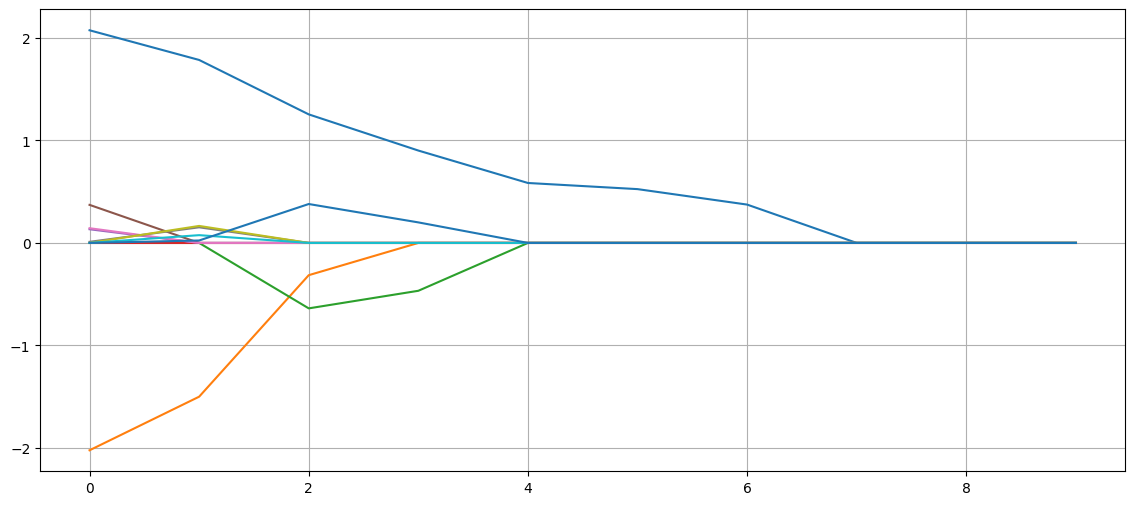

In [ ]:
plt.figure(figsize=[14,6])
for i in np.vstack(coef_l).T:
    plt.plot(i)
plt.grid()

#### На нашем датасете

#### 🧠 Упражнение 2

Возьмите датасет из пункта Полиномиальная регрессия со степенью 6.

Сделайте перебор коэффициента регуляризации `alpha` для `Lasso` регрессии от `0.00001` до `1000`


- Оцените метрику R2 на обучающей и тестовой выборках
- Сравните с переобученной моделью `LinearRegression` на данных с полиномизацией до 6 степени

##### 🧠 Упражнение 2 (ответ)


Возьмите датасет из пункта Полиномиальная регрессия со степенью 6.


In [ ]:
pf = PolynomialFeatures(degree=6).fit(X_train)
X_train_tmp = pf.transform(X_train)
X_test_tmp = pf.transform(X_test)


ss = StandardScaler().fit(X_train_tmp)
X_train_tmp = ss.transform(X_train_tmp)
X_test_tmp = ss.transform(X_test_tmp)

Сделайте перебор коэффициента регуляризации `alpha` для `Lasso` регрессии от `0.00001` до `1000`

In [ ]:
res_reg = pd.DataFrame(columns=['alpha', 'train_score', 'test_score'])


alphas = [0.00001, 0.01, 0.1, 1, 10, 1000]
for alpha in tqdm(alphas):
    model = Lasso(alpha=alpha).fit(X_train_tmp, y_train)

    res_reg_tmp = pd.DataFrame({
        'alpha': [alpha],
        'train_score': [model.score(X_train_tmp, y_train)],
        'test_score': [model.score(X_test_tmp, y_test)]
    })
    res_reg = pd.concat([res_reg, res_reg_tmp])

  0%|          | 0/6 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.762e+05, tolerance: 1.054e+02
  model = cd_fast.enet_coordinate_descent(
<ipython-input-263-513530fd8b14>:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  res_reg = pd.concat([res_reg, res_reg_tmp])
 17%|█▋        | 1/6 [00:38<03:11, 38.32s/it]/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, ch

- Оцените метрику R2 на обучающей и тестовой выборках
- Сравните с переобученной моделью `LinearRegression` на данных с полиномизацией до 6 степени

In [ ]:
model = LinearRegression().fit(X_train_tmp, y_train)

res_reg_tmp = pd.DataFrame({
    'alpha': [0],
    'train_score': [model.score(X_train_tmp, y_train)],
    'test_score': [model.score(X_test_tmp, y_test)]
})
res_reg_tmp

,alpha,train_score,test_score
0,0,0.80185295,-31428648236621844.00000000


In [ ]:
res_reg.sort_values('alpha', ascending=False)

,alpha,train_score,test_score
0,1000.00000000,0.00000000,-0.00079768
0,10.00000000,0.00000000,-0.00079768
0,1.00000000,0.38993991,0.39743038
0,0.10000000,0.44286280,0.43977865
0,0.01000000,0.45898630,0.44925921
0,0.00001000,0.47235016,0.35700580


# **Дополнительные материалы**
1. Метрики для регрессии - https://youtu.be/vh2smjQyhp8
4. Регуляризация в линейной модели - https://www.youtube.com/watch?v=L_o8v5A23XA
5. Регуляризация - https://proproprogs.ru/ml/ml-l2-regulyarizator-matematicheskoe-obosnovanie-i-primer-raboty
7. Регуляризация - https://www.youtube.com/watch?v=RvcP3a727Fg
8. Регуляризация - https://youtu.be/Q81RR3yKn30